<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/MAT_422_HM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1.3

##Helpful functions from homework 1.2

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# This function will generate a set of vectors that form a basis
def generateBasisVectors(range = [0, 100],dim=3):
  detX = 0
  while int(np.round(detX, 10)) == 0: #If it is basically zero will kick due to floating point error
    X = np.random.randint(range[0], range[1], [dim, dim])
    detX = np.linalg.det(X)

  return X

#find the projection of vector v onto u
def project(v, u):
  return np.dot(v, u) / np.dot(u, u) * u

def GramSmidt(vectorsV, norm = True):

  vectorsU = []
  vectorsE = []

  vectorsU.append(vectorsV[0])
  vectorsE.append(vectorsV[0] / np.linalg.norm(vectorsV[0]))

  for v in vectorsV[1:]:
    vec = v
    for u in vectorsU:
      vec = vec - project(vec, u)

    vectorsU.append(vec)
    vectorsE.append(vec / np.linalg.norm(vec))

  if norm:
    return np.array(vectorsE)
  else:
    return np.array(vectorsU)



##1.3.1 QR Decompasition

In [38]:
A = generateBasisVectors(range = [-10, 10], dim = 3)
print("Matrix A")
print(A)

Matrix A
[[  7   2   5]
 [ -7   5  -6]
 [-10  -1   6]]


In [39]:
def QR_decomposition(A):
  dim = A.shape[0]
  Q = GramSmidt(A.T, norm = True)

  R = np.zeros([dim, dim])

  for i in range(dim):
    for j in range(dim - i):
      R[i , i + j] = np.dot(Q[i], A.T[i + j])

  return Q.T, R

Q, R = QR_decomposition(A)

print(R)
print(Q)
print()

print("Check same?")
print(A)
print(np.round(np.matmul(Q, R), 5))
print()


[[14.07124728 -0.78173596  1.20813739]
 [ 0.          5.42115199 -4.62181389]
 [ 0.          0.          8.6127371 ]]
[[ 0.49746834  0.44066075  0.74722377]
 [-0.49746834  0.85057772 -0.17041946]
 [-0.71066905 -0.28694188  0.64235026]]

Check same?
[[  7   2   5]
 [ -7   5  -6]
 [-10  -1   6]]
[[  7.   2.   5.]
 [ -7.   5.  -6.]
 [-10.  -1.   6.]]



# 1.3.2 Least squares

[5.40979301 1.87443707]


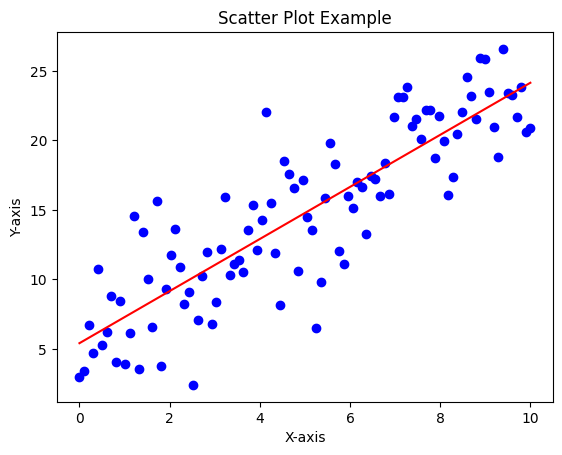

In [32]:
def leastSquares(A, Y):
    AATI = np.linalg.inv(np.matmul(A.T, A))
    w = np.matmul(AATI, np.matmul(A.T, Y))
    return w

def generate_linear_data(n_points=100, slope=2, intercept=5, noise_level=1, range = [0, 10]):
    x = np.linspace(range[0], range[1], n_points)
    noise = np.random.normal(0, noise_level, n_points)
    y = slope * x + intercept + noise
    return x, y

# Example usage
X, Y = generate_linear_data(noise_level = 3)
ones_ = np.ones(len(Y), float)

A = np.column_stack((ones_, X))
M = leastSquares(A, Y)

print(M)
m = M[1]
b = M[0]
line_y = m * X + b

plt.scatter(X, Y, color='blue', marker='o')
plt.plot(X, line_y, color='red', label=f'Line: Y = {m}X + {b}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Example')

plt.show()

#1.3.3 Linear Regression

Simulate a machine learning algorithm for plotting a line though 4 observations using the least squares cost function
test this model against the least squares method and compare the R^2 values

In [51]:
def Rsquared(Y,Yp):
  V = Y-Yp
  Ymean = np.average(Y)
  totvar = np.sum((Y-Ymean)**2)
  unexpvar = np.sum(np.abs(V**2))
  R2 = 1-unexpvar/totvar
  return(R2)

def generateRandomFunctionData(obs = 4, points=100, noise=1):
  X = 10 * np.random.rand(obs, points)
  weights = np.random.rand(obs)

  noise_ = np.random.normal(0, noise, points)
  Y = np.matmul(X.T, weights) + noise_

  return X.T, Y, weights

X, Y, _ = generateRandomFunctionData(obs = 4, points=1000, noise=1)

ones_ = np.ones(len(Y), float)
A = np.column_stack((ones_, X))
M = leastSquares(A, Y)

print("Least Squares model")
print(M)
Yp = np.matmul(X, M[1:]) + M[0]

R2 = Rsquared(Y,Yp)
print(f"R Squared: {R2}")
print()


def LeastSquaresCostFunction(W,X,Y):
  G = -1 * Y + np.matmul(X, W)
  return np.dot(G,G)

def T7LeastSquaresCostFunction(W, X, Y): # The T7 is supposed to look like a triangle to symbolize the gradient
  G = -1 * Y + np.matmul(X, W)
  return np.matmul(X.T, G)

W = [1] * 5
alpha = 10**-5
i = 0
prev = LeastSquaresCostFunction(W, A, Y) + 1
current = LeastSquaresCostFunction(W, A, Y)

while current < prev and i < 250000:
    prev = LeastSquaresCostFunction(W, A, Y)
    W = W - alpha * T7LeastSquaresCostFunction(W, A, Y)
    current = LeastSquaresCostFunction(W, A, Y)
    i = i + 1

print("Gradients decents model")
print(f"Iterations taken : {i}")
print(W)
Yp = np.matmul(X, W[1:]) + W[0]

R2 = Rsquared(Y,Yp)
print(f"R Squared: {R2}")
print()

from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(A,Y)
K = LR.coef_
K[0] = LR.intercept_

print("SKLearn machine learning linear regression model")
print(K)
Yp = np.matmul(X, K[1:]) + K[0]

R2 = Rsquared(Y,Yp)
print(f"R Squared: {R2}")

Least Squares model
[0.18079126 0.82193992 0.47738792 0.6295641  0.30353513]
R Squared: 0.9227077918360834

Gradients decents model
Iterations taken : 16660
[0.18079319 0.82193983 0.47738783 0.629564   0.30353504]
R Squared: 0.922707791836061

SKLearn machine learning linear regression model
[0.18079126 0.82193992 0.47738792 0.6295641  0.30353513]
R Squared: 0.9227077918360834
